In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('ER Wait Time Dataset.csv')
df.head()

,Visit ID,Patient ID,Hospital ID,Hospital Name,Region,Visit Date,Day of Week,Season,Time of Day,Urgency Level,Nurse-to-Patient Ratio,Specialist Availability,Facility Size (Beds),Time to Registration (min),Time to Triage (min),Time to Medical Professional (min),Total Wait Time (min),Patient Outcome,Patient Satisfaction
0,HOSP-1-20240210-0001,PAT-00001,HOSP-1,Springfield General Hospital,Urban,2024-02-10 20:20:56,Saturday,Winter,Late Morning,Medium,4,3,92,17,22,66,105,Discharged,1
1,HOSP-3-20241128-0001,PAT-00002,HOSP-3,Northside Community Hospital,Rural,2024-11-28 02:07:47,Thursday,Fall,Evening,Medium,4,0,38,9,30,30,69,Discharged,3
2,HOSP-3-20240930-0002,PAT-00003,HOSP-3,Northside Community Hospital,Rural,2024-09-30 04:02:28,Monday,Fall,Evening,Low,5,1,38,38,40,125,203,Discharged,1
3,HOSP-2-20240227-0001,PAT-00004,HOSP-2,Riverside Medical Center,Urban,2024-02-27 00:31:13,Tuesday,Winter,Evening,High,4,5,94,8,16,64,88,Discharged,2
4,HOSP-1-20240306-0002,PAT-00005,HOSP-1,Springfield General Hospital,Urban,2024-03-06 16:52:26,Wednesday,Spring,Afternoon,Low,4,8,74,26,29,63,118,Discharged,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Visit ID                            5000 non-null   object
 1   Patient ID                          5000 non-null   object
 2   Hospital ID                         5000 non-null   object
 3   Hospital Name                       5000 non-null   object
 4   Region                              5000 non-null   object
 5   Visit Date                          5000 non-null   object
 6   Day of Week                         5000 non-null   object
 7   Season                              5000 non-null   object
 8   Time of Day                         5000 non-null   object
 9   Urgency Level                       5000 non-null   object
 10  Nurse-to-Patient Ratio              5000 non-null   int64 
 11  Specialist Availability             5000 non-null   int6

In [5]:
df.isnull().sum()

Visit ID                              0
Patient ID                            0
Hospital ID                           0
Hospital Name                         0
Region                                0
Visit Date                            0
Day of Week                           0
Season                                0
Time of Day                           0
Urgency Level                         0
Nurse-to-Patient Ratio                0
Specialist Availability               0
Facility Size (Beds)                  0
Time to Registration (min)            0
Time to Triage (min)                  0
Time to Medical Professional (min)    0
Total Wait Time (min)                 0
Patient Outcome                       0
Patient Satisfaction                  0
dtype: int64

In [6]:
df.describe()

,Nurse-to-Patient Ratio,Specialist Availability,Facility Size (Beds),Time to Registration (min),Time to Triage (min),Time to Medical Professional (min),Total Wait Time (min),Patient Satisfaction
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,3.238200,3.875000,87.118800,11.704200,24.827000,45.385400,81.916600,2.771600
std,1.200895,3.043292,57.998585,10.437284,24.807994,35.619975,68.084538,1.424584
min,1.000000,0.000000,10.000000,0.000000,1.000000,2.000000,4.000000,1.000000
25%,3.000000,1.000000,36.000000,3.000000,6.000000,17.000000,27.000000,1.000000
50%,3.000000,3.000000,74.000000,8.000000,16.000000,35.000000,60.000000,3.000000
75%,4.000000,6.000000,138.000000,18.000000,36.000000,66.000000,122.000000,4.000000
max,5.000000,10.000000,200.000000,66.000000,163.000000,233.000000,442.000000,5.000000


In [7]:
df['Visit Date'] = pd.to_datetime(df['Visit Date'].str.strip()) # convert to datetime since it's currently a string 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Visit ID                            5000 non-null   object        
 1   Patient ID                          5000 non-null   object        
 2   Hospital ID                         5000 non-null   object        
 3   Hospital Name                       5000 non-null   object        
 4   Region                              5000 non-null   object        
 5   Visit Date                          5000 non-null   datetime64[ns]
 6   Day of Week                         5000 non-null   object        
 7   Season                              5000 non-null   object        
 8   Time of Day                         5000 non-null   object        
 9   Urgency Level                       5000 non-null   object        
 10  Nurse-to-Patient Ratio  

Distribution of total wait time

<function matplotlib.pyplot.show(close=None, block=None)>

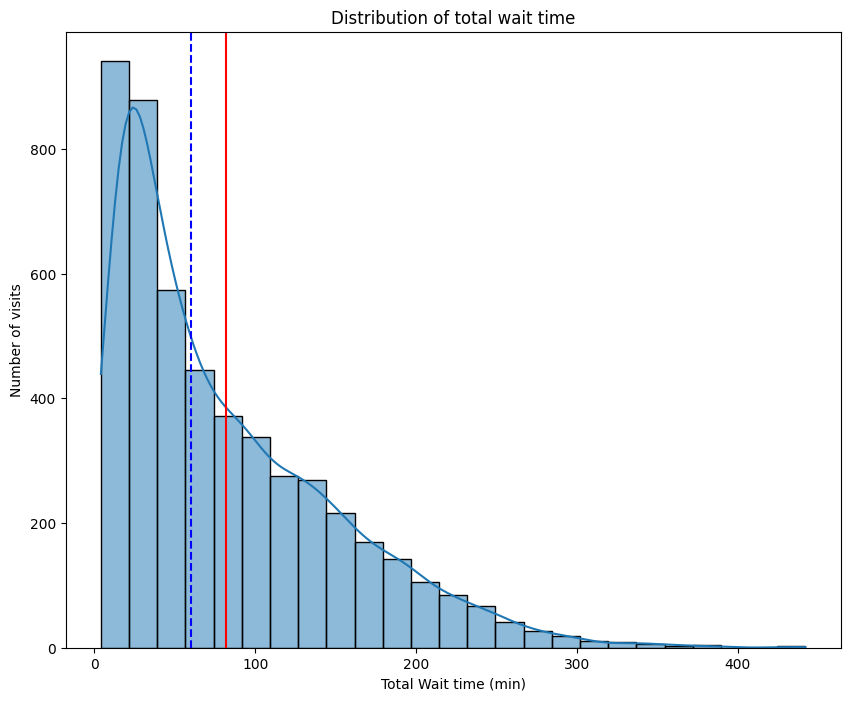

In [8]:
plt.figure(figsize=(10, 8))
sns.histplot(df['Total Wait Time (min)'], bins=25, kde=True)
plt.axvline(df['Total Wait Time (min)'].mean(), color='red')
plt.axvline(df['Total Wait Time (min)'].median(), color='blue', ls='--')
plt.ylabel("Number of visits")
plt.xlabel("Total Wait time (min)")
plt.title("Distribution of total wait time")
plt.show

The tail on the right side is pulled out by outliers.

The Median (Blue Line): 50% of your patients waited less than a certain amount of time. It represents the "typical" experience.

The Mean (Red Line): The average is skewed a bit to the right by those rare patients who waited 300 or 400 minutes.

A few very long wait times are drastically inflating the hospital's average, even if most people are seen relatively quickly.

In [9]:
print(f"Skewness: {df['Total Wait Time (min)'].skew()}") # confirms that its right skewed because of positive number

Skewness: 1.1942079844935944


Urban vs Rural

<function matplotlib.pyplot.show(close=None, block=None)>

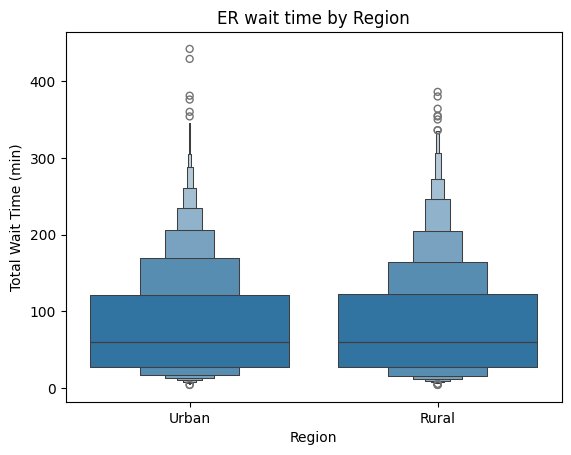

In [13]:
sns.boxenplot(x=df['Region'], y=df['Total Wait Time (min)'], data=df)
plt.title("ER wait time by Region")
plt.show

How does Urgency level effect the wait time?

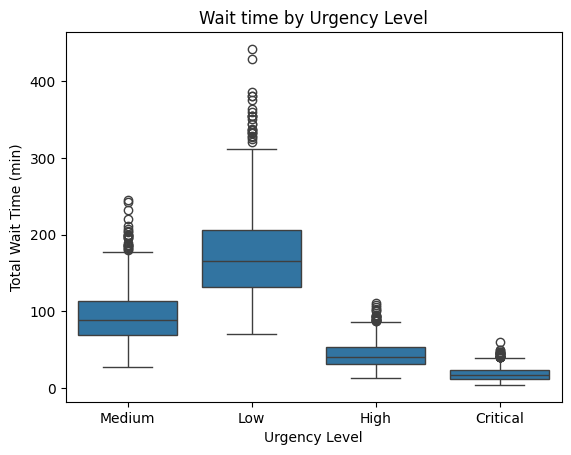

In [15]:
sns.boxplot(x=df['Urgency Level'], y=df['Total Wait Time (min)'], data=df)
plt.title("Wait time by Urgency Level")
plt.show()

Wait time by days of the week

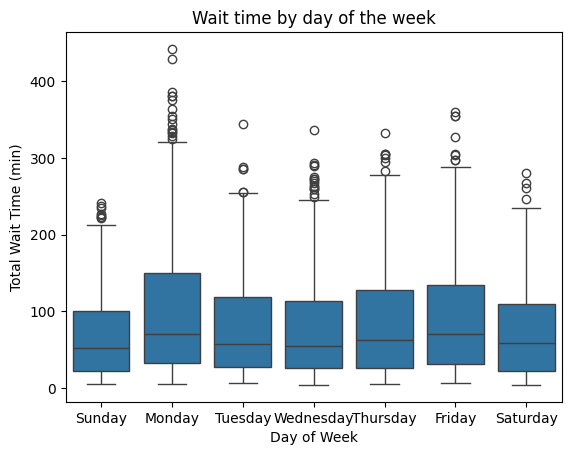

In [17]:
sns.boxplot(x=df['Day of Week'], y=df['Total Wait Time (min)'], data=df, order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.title("Wait time by day of the week")
plt.show()

In [18]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['visit_id', 'patient_id', 'hospital_id', 'hospital_name', 'region',
       'visit_date', 'day_of_week', 'season', 'time_of_day', 'urgency_level',
       'nurse-to-patient_ratio', 'specialist_availability',
       'facility_size_(beds)', 'time_to_registration_(min)',
       'time_to_triage_(min)', 'time_to_medical_professional_(min)',
       'total_wait_time_(min)', 'patient_outcome', 'patient_satisfaction'],
      dtype='object')